<a href="https://colab.research.google.com/github/anjali20082/PerfEval/blob/master/CorrelationAnalysis_PythonNotebooks/Response_Time_Analysis/SpearmanCorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
# matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.svm import SVR
#from skfeature.function.similarity_based import fisher_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.manifold import MDS
import csv
import sys
import scipy
%matplotlib inline

plt.rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['figure.figsize'] = 14, 10

SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

feature_lists = {
	"youtube": ["Youtube_search channel page", "Youtube_search channel page", "Youtube_search video page","Youtube_play video page"],
	"linkedin":["LinkedIn_view profile", "LinkedIn_check my connections","LinkedIn_search results page", "LinkedIn_person profile page"],
	"hotstar":["Hotstar_open trending page", "Hotstar_search video"],
	"facebook":["Facebook_search results page","Facebook_person profile page"],
	"flipkart":["Flipkart_search product","Flipkart_product profile page","Flipkart_add to cart","Flipkart_go to cart"],
	"amazon":["Amazon_search results page", "Amazon_product profile page", "Amazon_add to cart", "Amazon_go to cart", "Amazon_remove from cart"],
	"telegram":["Telegram_sending message"],
	"whatsapp":["Whatsapp_sending message"],
	"gmaps":["GoogleMaps_searching place"],
	"gnews":["GoogleNews_opening news page"],
	"dailyhunt":["Dailyhunt_search results page", "Dailyhunt_opening news page"],
	"paytm":["Paytm_transaction from wallet"],
	# "mobikwik":["Mobikwik_transaction from wallet"]

}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
clusters = {
	"youtube":2,
	"linkedin":4,
	"hotstar":2,
	"facebook":2,
	"flipkart":2,
	"amazon":2,
	"telegram":4,
	"whatsapp":4,
	"gmaps":2,
	"gnews":2,
	"dailyhunt":2,
	"paytm":4,
	# "mobikwik":3
}
cols_to_norm = ['LATENCY','PING_MEDIAN_GOOGLE']
cols_to_norm_mod = ['LATENCY_NORM','PING_MEDIAN_NORM']

dataset = pd.read_csv('/content/drive/MyDrive/Capstone_PerfEval/CorrelationAnalysis/Distance_0.csv')
#dataset = dataset.drop(columns=['STUDENT'])
print(dataset['DISTANCE'].unique())
print(dataset[['PING_MEDIAN_GOOGLE', 'PING_MEDIAN_AMAZON', 'PING_MEDIAN_MOBIKWIK']])
print(scipy.stats.pearsonr(dataset['PING_MEDIAN_GOOGLE'].values, dataset['PING_MEDIAN_AMAZON']))
print(scipy.stats.pearsonr(dataset['PING_MEDIAN_MOBIKWIK'].values, dataset['PING_MEDIAN_AMAZON']))
print(scipy.stats.pearsonr(dataset['PING_MEDIAN_GOOGLE'].values, dataset['PING_MEDIAN_MOBIKWIK']))

print(scipy.stats.pearsonr(dataset['PING_MEDIAN_GOOGLE'].values, dataset['DISTANCE'].values))
print(scipy.stats.spearmanr(dataset['PING_MEDIAN_GOOGLE'].values, dataset['DISTANCE'].values))
print(scipy.stats.kendalltau(dataset['PING_MEDIAN_GOOGLE'].values, dataset['DISTANCE'].values))

print()
print(scipy.stats.spearmanr(dataset['PING_MIN_GOOGLE'].values, dataset['DISTANCE'].values))
print(scipy.stats.spearmanr(dataset['PING_MIN_AMAZON'].values, dataset['DISTANCE'].values))
print(scipy.stats.spearmanr(dataset['PING_MIN_MOBIKWIK'].values, dataset['DISTANCE'].values))


#bins = np.array([i * 100 for i in range(50)])
#dataset['PING_DIS'] = pd.cut(dataset['PING_MEDIAN_GOOGLE'], bins=bins, labels=False)

#print(scipy.stats.spearmanr(dataset['PING_DI'].values, dataset['DISTANCE'].values))

#print(scipy.stats.spearmanr(dataset['PING_MEDIAN_GOOGLE'].values, dataset[''].values))

#print(scipy.stats.spearmanr(dataset[dataset['PING_DIS'] == 0]['PING_DIS'].values, dataset['DISTANCE'].values))
#print(scipy.stats.spearmanr(dataset['PING_DIS'].values, dataset['NET_TYPE'].values))

# print(dataset['PING_MEDIAN_DIS'])
# #shaved = dataset[dataset['PING_MEDIAN_GOOGLE'] > 500]
# #print(len(shaved))
# print(scipy.stats.spearmanr(shaved['PING_MEDIAN_GOOGLE'].values, shaved['DISTANCE'].values))
# print(scipy.stats.spearmanr(shaved['PING_MEDIAN_GOOGLE'].values, shaved['NET_TYPE'].values))
# print(shaved[shaved['NET_TYPE'] == 2])

[0]
       PING_MEDIAN_GOOGLE  PING_MEDIAN_AMAZON  PING_MEDIAN_MOBIKWIK
0                    8.35                12.2                 32.00
1                    8.35                12.2                 32.00
2                    8.35                14.5                 31.50
3                    8.35                14.5                 31.50
4                    7.43                16.7                 30.20
...                   ...                 ...                   ...
10778               78.85               110.0                 76.95
10779               78.70               113.0                 78.70
10780               78.05               107.5                 79.65
10781               76.90               120.0                 83.00
10782               75.25               123.0                 80.15

[10783 rows x 3 columns]
(0.5159765926973717, 0.0)
(0.5911773294901206, 0.0)
(0.7083813856957548, 0.0)
(nan, nan)
SpearmanrResult(correlation=nan, pvalue=nan)
KendalltauResult(cor

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [ ]:
print('Spearman, ping_median, ping_min', scipy.stats.spearmanr(dataset['PING_MEDIAN_GOOGLE'], dataset['PING_MIN_GOOGLE']))
print('Spearman, Android, RAM', scipy.stats.spearmanr(dataset['ANDROID'], dataset['RAM']))
print('Spearman, RAM, Distance', scipy.stats.spearmanr(dataset['RAM'], dataset['DISTANCE']))
print('Spearman, Android, Distance', scipy.stats.spearmanr(dataset['ANDROID'], dataset['DISTANCE']))

Spearman, ping_median, ping_min SpearmanrResult(correlation=0.8639973203760156, pvalue=0.0)
Spearman, Android, RAM SpearmanrResult(correlation=0.43662105399342627, pvalue=0.0)
Spearman, RAM, Distance SpearmanrResult(correlation=nan, pvalue=nan)
Spearman, Android, Distance SpearmanrResult(correlation=nan, pvalue=nan)


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [ ]:
features =  dataset['FEATURE'].unique()
dataset['DISTANCE_DIS'] = dataset['DISTANCE'] / np.max(dataset['DISTANCE'].values)
dataset['DISTANCE_DIS'] = np.digitize(dataset['DISTANCE_DIS'].values, [-0.01, 0.33, 0.66, 1.01])
#print(dataset['DISTANCE_DIS'], dataset)

student_list = {}
feature_student_list = {}
for feature in features:
    temp_dataset = (dataset[dataset['FEATURE'] == feature])
#     temp_dataset = temp_dataset[temp_dataset['DISTANCE'] > 0.3]
#     bins = np.array([i * 100 for i in range(50)]
    
    
    #print(scipy.stats.spearmanr(dataset['PING_MEDIAN_GOOGLE'].values, dataset['DISTANCE_DIS'].values))

    #print('Pearson', feature, scipy.stats.pearsonr(temp_dataset['LATENCY'], temp_dataset['DISTANCE']))
    print('Spearman, latency, ping_median', feature, scipy.stats.spearmanr(temp_dataset['LATENCY'], temp_dataset['PING_MEDIAN_GOOGLE'])[0], sep=',')
    print('Spearman, latency, ping_min', feature, scipy.stats.spearmanr(temp_dataset['LATENCY'], temp_dataset['PING_MIN_GOOGLE'])[0], sep=',')
    print('Spearman, latency, RAM', feature, scipy.stats.spearmanr(temp_dataset['LATENCY'], temp_dataset['RAM'])[0] * -1, sep=',')
    print('Spearman, latency, Network', feature, scipy.stats.spearmanr(temp_dataset['LATENCY'], temp_dataset['NET_TYPE'])[0], sep=',')
    print('Spearman, latency, Time of Day', feature, scipy.stats.spearmanr(temp_dataset['LATENCY'], temp_dataset['TIME_OF_DAY'])[0], sep=',')
    print('Spearman, latency, Android', feature, scipy.stats.spearmanr(temp_dataset['LATENCY'], temp_dataset['ANDROID'])[0] * -1, sep=',')
    print('Spearman, latency, distance', feature, scipy.stats.spearmanr(temp_dataset['LATENCY'], temp_dataset['DISTANCE'])[0], sep=',')
    print()
    median_group = pd.DataFrame(temp_dataset.groupby(["STUDENT", "NET_TYPE"])["LATENCY"].median())
    median_group.columns = [''.join(col).strip() for col in median_group.columns.values]
    median_group = median_group[~median_group.index.duplicated(keep='first')]
    #median_group.columns = ["STUDENT", "NET_TYPE", "LATENCY"]
    
    overall75percentile = np.percentile(temp_dataset['LATENCY'].values, 75)
    overallmedian = np.median(temp_dataset['LATENCY'].values)
    #print(median_group)
    rownum = 0
    for median_value in median_group['LATENCY'].values:
        #print(median_value, overall75percentile)

        if median_value >= overall75percentile:
            student_name = median_group.index[rownum][0]
            net_type = median_group.index[rownum][1]
            #print(feature, student_name, net_type)
            try:
                student_list[(student_name, net_type)] += 1
            except:
                student_list[(student_name, net_type)] = 1
                feature_student_list[(feature, student_name, net_type)] = 1
        rownum += 1

for student_name, net_type in student_list:
    if student_list[(student_name, net_type)] > 0:
        print(student_name, net_type, student_list[(student_name, net_type)])
        #         else:
#             print(student_name, median_value, overall75percentile)

    #student_list.append((student_name, net_type))
    #anomalous_student_dataset = temp_dataset[(temp_dataset["STUDENT"] == student_name) & (temp_dataset["NET_TYPE"] == net_type)]
    
    #print(feature, np.percentile(temp_dataset['LATENCY'].values, [50, 75, 90, 99]),
    #      np.percentile(anomalous_student_dataset['LATENCY'].values, [50, 75, 90, 99]))
    #print(feature, np.median(temp_dataset['LATENCY']), np.max(median_group['LATENCY'].values), "\n") 
#     #print('Spearman distance, ping', feature, scipy.stats.spearmanr(temp_dataset['DISTANCE'], temp_dataset['PING_MEDIAN_GOOGLE']))
    
    #print()
#     #print('Kendall', feature, scipy.stats.kendalltau(temp_dataset['LATENCY'], temp_dataset['PING_MEDIAN_GOOGLE']))
#     #print(temp_dataset)
# #     print(feature, scipy.stats.spearmanr(dataset[dataset['FEATURE'] == feature]['LATENCY'],
# #                    dataset[dataset['FEATURE'] == feature]['PING_MEDIAN_GOOGLE']))
from collections import Counter
student_set = Counter(student_list)
#print(student_set)
#akanksha -- all 31

Spearman, latency, ping_median,Youtube_search channel page,0.23907446700905688
Spearman, latency, ping_min,Youtube_search channel page,0.14833077907966846
Spearman, latency, RAM,Youtube_search channel page,0.2522852099728158
Spearman, latency, Network,Youtube_search channel page,0.13723905172317635
Spearman, latency, Time of Day,Youtube_search channel page,-0.04674536705848549
Spearman, latency, Android,Youtube_search channel page,0.11097065092685936
Spearman, latency, distance,Youtube_search channel page,nan

Spearman, latency, ping_median,Youtube_open channel page,0.27452530288678784
Spearman, latency, ping_min,Youtube_open channel page,0.17331041425532073
Spearman, latency, RAM,Youtube_open channel page,0.044918881762585926
Spearman, latency, Network,Youtube_open channel page,0.26160408569209864
Spearman, latency, Time of Day,Youtube_open channel page,-0.007892559099816909
Spearman, latency, Android,Youtube_open channel page,-0.00046897463754334086
Spearman, latency, distance,Youtub

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Spearman, latency, Time of Day,Facebook_search results page,-0.11543804186993475
Spearman, latency, Android,Facebook_search results page,-0.19008021305967712
Spearman, latency, distance,Facebook_search results page,nan

Spearman, latency, ping_median,Facebook_person profile page,0.11579350139211803
Spearman, latency, ping_min,Facebook_person profile page,0.17209785930050805
Spearman, latency, RAM,Facebook_person profile page,0.1483310957037456
Spearman, latency, Network,Facebook_person profile page,-0.0523587618004357
Spearman, latency, Time of Day,Facebook_person profile page,-0.04683018177682757
Spearman, latency, Android,Facebook_person profile page,-0.22726222717966305
Spearman, latency, distance,Facebook_person profile page,nan

Spearman, latency, ping_median,GoogleMaps_searching place,0.27655900263503874
Spearman, latency, ping_min,GoogleMaps_searching place,0.20059526629285607
Spearman, latency, RAM,GoogleMaps_searching place,0.1329615322966113
Spearman, latency, Network,GoogleM

[' ping_median' ' ping_min' ' RAM' ' Network' ' Time of Day' ' Android']
[[ 2.39074467e-01  1.48330779e-01  2.52285210e-01  1.37239052e-01
  -4.67453671e-02  1.10970651e-01]
 [ 2.74525303e-01  1.73310414e-01  4.49188818e-02  2.61604086e-01
  -7.89255910e-03 -4.68974638e-04]
 [ 1.92709381e-01  5.57748827e-02  6.06778768e-02  2.18201550e-01
  -2.44240573e-02 -2.04002654e-02]
 [ 1.03982521e-01  9.71909195e-02 -2.64657294e-01  1.40312419e-01
  -6.49278060e-02 -2.50026916e-01]
 [-1.65615774e-02 -4.02985204e-02 -6.81287578e-03  2.35666027e-01
  -1.18957095e-01 -2.31327153e-02]
 [-1.37398385e-01 -2.02378660e-01 -1.42342915e-01 -9.44128758e-02
  -3.17160658e-02  4.03707460e-02]
 [ 3.33959249e-02  2.74401726e-02  1.05391383e-01  7.93357476e-02
  -8.61071757e-02  3.08912690e-03]
 [-1.34213889e-01 -1.69568951e-01  2.89756343e-02  9.22174430e-02
  -9.21632334e-02  7.75461835e-02]
 [-7.10585927e-02 -1.65640616e-02 -6.92572415e-02 -9.64918778e-02
  -1.15438042e-01 -1.90080213e-01]
 [ 1.15793501e-01 

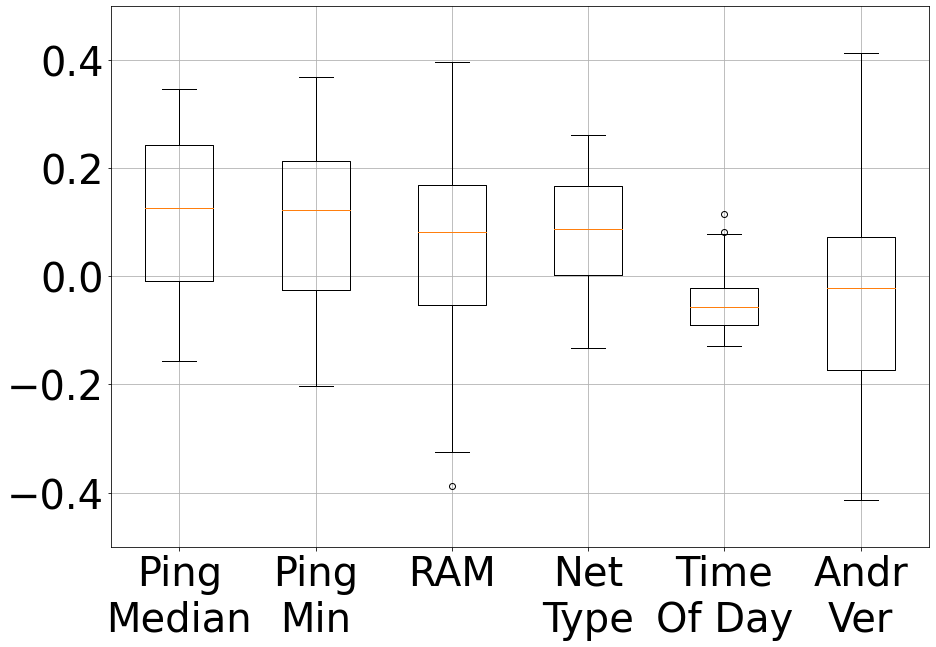

In [ ]:
correlation_df = pd.read_csv('/content/drive/MyDrive/Capstone_PerfEval/CorrelationAnalysis/correlation-distance_0.txt', sep=',', index_col=False, header=None)
correlation_df.columns=['SPEARMAN', 'LATENCY', 'PARAMETER', 'FEATURE', 'CORRELATION']
# print(correlation_df)

parameter_list = correlation_df['PARAMETER'].unique()
values = [0] * 6
parameter_list=np.delete(parameter_list, 6)
print(parameter_list)
cnt = 0
for parameter in parameter_list:
    values[cnt] = correlation_df[correlation_df['PARAMETER'] == parameter]['CORRELATION'].values
    # print(values[cnt])
    cnt += 1
values = np.stack(values, axis=0 )
values = np.transpose(values)
print(values)
# print(values[~np.isnan(values).any(axis=1), :])
filtered_data = values[~np.isnan(values).any(axis=1), :]
print(filtered_data)

parameter_list = ['Ping\nMedian', 'Ping\nMin', 'RAM', 'Net\nType', 'Time\nOf Day', 'Andr\nVer']
plt.boxplot(filtered_data, labels=parameter_list)
plt.grid()
plt.ylim([-0.5, 0.5])
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/CorrelationAnalysis/correlation-Distance_0.pdf', bbox_inches='tight')

In [ ]:
np.median(dataset['PING_MEDIAN_GOOGLE'].values)

51.1

In [ ]:
def kmeans():
    feature_labels = ["Android\nVersion","Distance","RAM","Time of\nDay","Net\nType", "Ping\nMedian"]
    print(np.median(dataset['PING_MEDIAN_GOOGLE']))
    values = [0] * len(feature_lists)
    counts = [0] * 5 * len(feature_lists)
    count = 0
    feature_cols = [1,2,3,5,6,7]
    for app in feature_lists:
            print("Analysis for", app)
            app_data = dataset[dataset['FEATURE'].isin(feature_lists[app])]
            #print(app_data)
            app_data[cols_to_norm_mod] = app_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
            X = app_data.iloc[:,feature_cols]
            kmeans = KMeans(n_clusters=clusters[app])
            latency = app_data[['LATENCY_NORM']]
            print(app_data)
            latency_kmeans = kmeans.fit_predict(latency)
            #print(np.min(app_data[['LATENCY']][latency_kmeans == 0].values), np.max(app_data[['LATENCY']][latency_kmeans == 0].values))
            #print(np.min(app_data[['LATENCY']][latency_kmeans == 1].values), np.max(app_data[['LATENCY']][latency_kmeans == 1].values))
            #print(np.min(app_data[['LATENCY']][latency_kmeans == 2].values), np.max(app_data[['LATENCY']][latency_kmeans == 2].values))
            #print(np.min(app_data[['LATENCY']][latency_kmeans == 3].values), np.max(app_data[['LATENCY']][latency_kmeans == 3].values))
            app_data['LATENCY_LABELS'] = latency_kmeans

            y = app_data['LATENCY_LABELS']
                        
            clf2 = DecisionTreeClassifier()
            clf2.fit(X,y)
            importance = clf2.feature_importances_
            #plt.figure()
            #graphname = app + "_features_dt"
            #plt.title(graphname )
            #plt.xlabel("Features")
            #plt.ylabel("Importance score")
            values[count] = importance
            counts[count] = 1
            count += 1
            #print(feature_labels, importance)
#             plt.bar(feature_labels, importance)
#             plt.xticks(rotation = 45)
#             plt.ylim([0, 1])
#             plt.tight_layout()
#             output_path = graphname +  ".pdf"
#             plt.savefig(output_path, bbox_inches='tight')
    values = np.stack(values, axis=0)
    plt.figure()
    plt.boxplot(values, labels=feature_labels)
    #plt.xticks(rotation = 45)
    plt.ylim([0,1])
    plt.xlabel('Features')
    plt.ylabel('Feature Importance')
    plt.savefig('feature_ranking.pdf', bbox_inches='tight')
    
def kmeans_no_ping():
    feature_labels = ["Android\nVersion","Distance","RAM","Time of\nDay","Net\nType"]
    values = [0] * len(feature_lists)
    counts = [0] * 5 * len(feature_lists)
    count = 0
    feature_cols = [1,2,3,5,6]
    for app in feature_lists:
            print("Analysis for", app)
            app_data = dataset[dataset['FEATURE'].isin(feature_lists[app])]
            #print(app_data)
            app_data[cols_to_norm_mod] = app_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
            X = app_data.iloc[:,feature_cols]
            kmeans = KMeans(n_clusters=clusters[app])
            latency = app_data[['LATENCY_NORM']]
            latency_kmeans = kmeans.fit_predict(latency)
            #print(np.min(app_data[['LATENCY']][latency_kmeans == 0].values), np.max(app_data[['LATENCY']][latency_kmeans == 0].values))
            #print(np.min(app_data[['LATENCY']][latency_kmeans == 1].values), np.max(app_data[['LATENCY']][latency_kmeans == 1].values))
            #print(np.min(app_data[['LATENCY']][latency_kmeans == 2].values), np.max(app_data[['LATENCY']][latency_kmeans == 2].values))
            #print(np.min(app_data[['LATENCY']][latency_kmeans == 3].values), np.max(app_data[['LATENCY']][latency_kmeans == 3].values))
            app_data['LATENCY_LABELS'] = latency_kmeans

            y = app_data['LATENCY_LABELS']
            clf1=RandomForestClassifier(n_estimators=100)
            clf1.fit(X,y)
            
            clf2 = DecisionTreeClassifier()
            clf2.fit(X,y)
            importance = clf2.feature_importances_
            plt.figure()
            graphname = app + "_features_dt"
            plt.title(graphname )
            plt.xlabel("Features")
            plt.ylabel("Importance score")
            values[count] = importance
            counts[count] = 1
            count += 1
            #print(feature_labels, importance)
            plt.bar(feature_labels, importance)
            plt.xticks(rotation = 45)
            plt.ylim([0, 1])
            plt.tight_layout()
            output_path = graphname +  ".pdf"
            plt.savefig(output_path, bbox_inches='tight')
    values = np.stack(values, axis=0)
    plt.figure()
    print(values, feature_labels)
    plt.boxplot(values, labels=feature_labels)
    #plt.xticks(rotation = 45)
    plt.ylim([0,1])
    plt.xlabel('Features')
    plt.ylabel('Feature Importance')
    plt.savefig('feature_ranking_no_ping.pdf', bbox_inches='tight')
    
    
if __name__ == "__main__":
    kmeans_no_ping()


Analysis for youtube


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ValueError: ignored